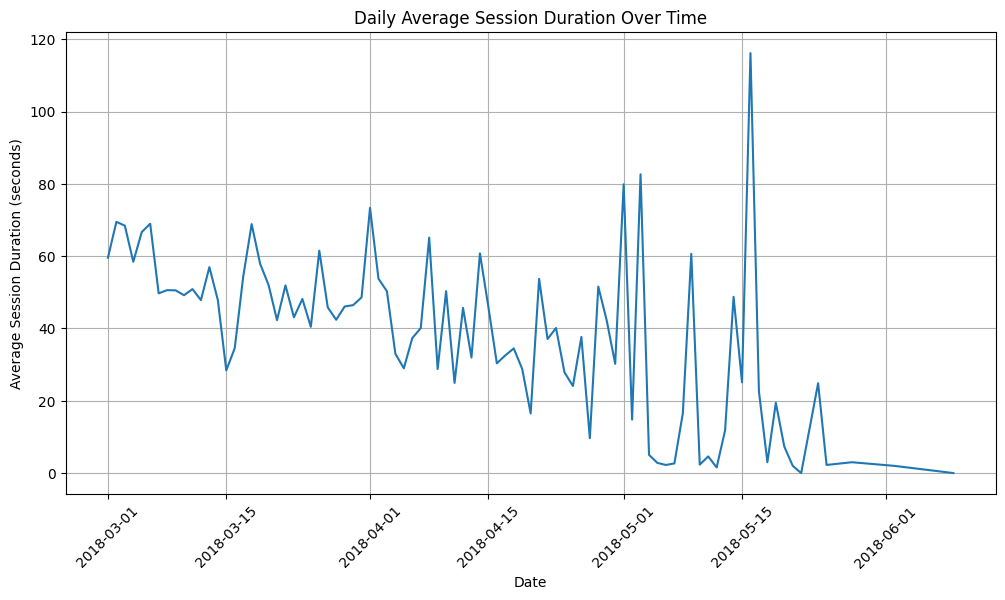

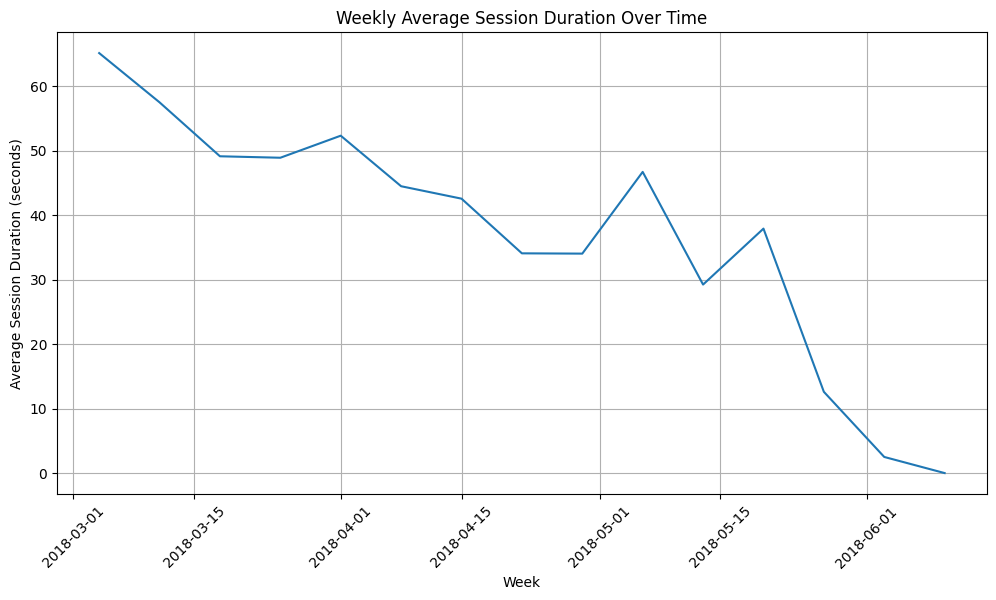

/var/folders/6z/bh7_dtkj0c7dqhfn_nwgx23r0000gn/T/ipykernel_76708/2299988303.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_engagement = data.groupby(pd.Grouper(key='TIMESTAMP', freq='M')).agg({'SESSION_DURATION': 'mean'}).reset_index()


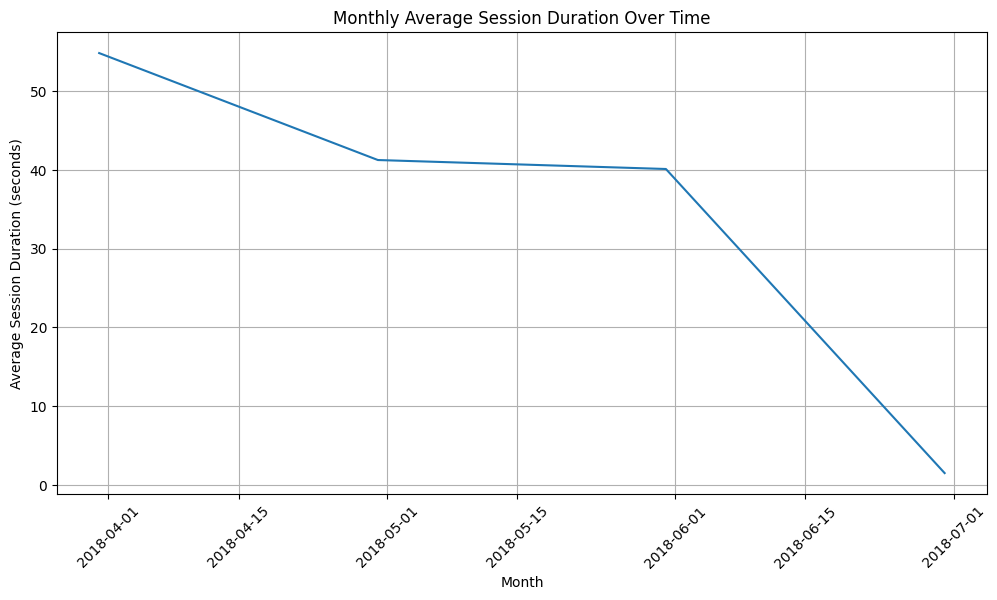

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
data = pd.read_excel('data.xlsx', parse_dates=['TIMESTAMP', 'FIRST DAY', 'INTERVENTION TIME'])

# Sort the data by user ID, session, and timestamp
data = data.sort_values(['ID', 'SESSION', 'TIMESTAMP'])

# Calculate the time difference between consecutive rows
data['TIME_DIFF'] = data.groupby(['ID', 'SESSION'])['TIMESTAMP'].diff()

# Calculate the session duration for each session
session_duration = data.groupby(['ID', 'SESSION'])['TIME_DIFF'].sum().reset_index()
session_duration.columns = ['ID', 'SESSION', 'SESSION_DURATION']

# Convert session duration to seconds
session_duration['SESSION_DURATION'] = session_duration['SESSION_DURATION'].dt.total_seconds()

# Remove outliers using the IQR method
Q1 = session_duration['SESSION_DURATION'].quantile(0.25)
Q3 = session_duration['SESSION_DURATION'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

session_duration = session_duration[(session_duration['SESSION_DURATION'] >= lower_bound) & (session_duration['SESSION_DURATION'] <= upper_bound)]

# Merge the session duration with the original data
data = pd.merge(data, session_duration, on=['ID', 'SESSION'])

# Group the data by date and calculate the average session duration for each day
daily_engagement = data.groupby(data['TIMESTAMP'].dt.date).agg({'SESSION_DURATION': 'mean'}).reset_index()

# Rename the columns for clarity
daily_engagement.columns = ['Date', 'Avg Session Duration']

# Plot the daily average session duration over time
plt.figure(figsize=(12, 6))
plt.plot(daily_engagement['Date'], daily_engagement['Avg Session Duration'])
plt.xlabel('Date')
plt.ylabel('Average Session Duration (seconds)')
plt.title('Daily Average Session Duration Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculate the weekly average session duration
weekly_engagement = data.groupby(pd.Grouper(key='TIMESTAMP', freq='W')).agg({'SESSION_DURATION': 'mean'}).reset_index()
weekly_engagement.columns = ['Week', 'Avg Session Duration']

# Plot the weekly average session duration over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_engagement['Week'], weekly_engagement['Avg Session Duration'])
plt.xlabel('Week')
plt.ylabel('Average Session Duration (seconds)')
plt.title('Weekly Average Session Duration Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculate the monthly average session duration
monthly_engagement = data.groupby(pd.Grouper(key='TIMESTAMP', freq='M')).agg({'SESSION_DURATION': 'mean'}).reset_index()
monthly_engagement.columns = ['Month', 'Avg Session Duration']

# Plot the monthly average session duration over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Month'], monthly_engagement['Avg Session Duration'])
plt.xlabel('Month')
plt.ylabel('Average Session Duration (seconds)')
plt.title('Monthly Average Session Duration Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()